# Load the data

In [1]:
# Import necessary packages
using DrWatson
using JLD2

# Activate the project environment
@quickactivate :FlowComplexity

# Define the file path
file_path = joinpath("./data", "data.jld2")

# Load the data from the specified file
@load file_path sim_array

1-element Vector{Symbol}:
 :sim_array

# Compute time series for 10 species

In [2]:
using DataFrames, Statistics

# Get the length of the array
nsim = length(sim_array)

# Get the first simulation of the array
first_sim = sim_array[1]

# Define the array that will hold our population time series
max_t = Int(first_sim.total_time)
nspecies = 10
pop_array = zeros(Int, nsim, max_t, nspecies)

# Populate the population array
for i in 1:nsim
    sim = sim_array[i]
    time_series_df = FlowComplexity.convert_timeseries_to_tidy_df(sim.time_evolution)
    
    for j in 1:max_t
        for k in 1:nspecies
            filtered_time_series_df = filter(row -> row[:time] == j && row[:variable] == string(k), time_series_df)
            pop_array[i, j, k] = filtered_time_series_df[1, :value]
        end
    end
end

# Calculate the averages
pop_avg_array = dropdims(mean(pop_array, dims=1), dims=1)

# Calculate the standard deviations
pop_std_array = dropdims(std(pop_array, dims=1), dims=1) ;

# Plot the time series

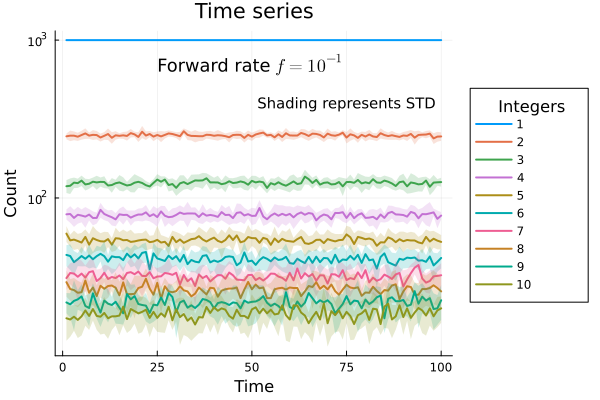

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/01_time-series/f=0.1/figs/time-series.pdf"

In [8]:
using Plots
using LaTeXStrings
using FileIO

# Create plot with basic settings
p = plot(
    title="Time series",
    xlabel="Time",
    ylabel="Count",
    yaxis=:log10,
    legendtitle="Integers",
    legend=:outerright
)

# Plot data for each species
for i in 1:nspecies
    plot!(
        p,
        1:max_t,
        pop_avg_array[:, i],
        lw=2,
        ribbon=pop_std_array[:, i],
        fillalpha=0.2,
        label="$i"
    )
end

# Add annotation
annotate!(50, 700, text("Forward rate " * L"f=10^{-1}", :black, 12))
annotate!(75, 400, text("Shading represents STD", :black, 10))

# Display and save plot
display(p)
mkpath("figs")
savefig("figs/time-series.pdf")

# Compute species distribution at time $t$

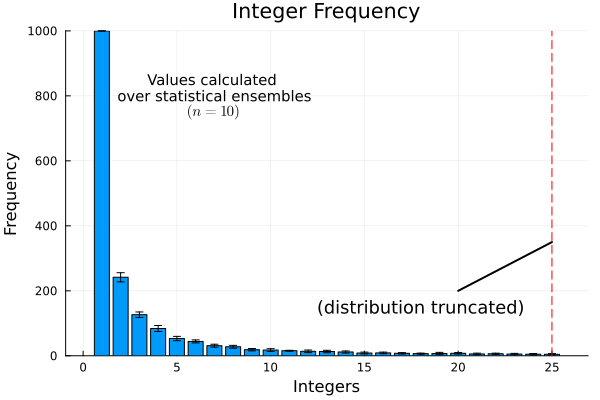

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/01_time-series/f=0.1/figs/hist.pdf"

In [9]:
using DataFrames, Statistics, Plots, LaTeXStrings, FileIO

# Initialize parameters and data structures
t = 10
nsim = length(sim_array)
hist = zeros(Int, 100000, nsim)

# Process each simulation
for i in 1:nsim
    sim = sim_array[i]
    time_series_df = FlowComplexity.convert_timeseries_to_tidy_df(sim.time_evolution)

    # Filter the time series data for the specified time `t`
    filtered_time_series_df = filter(row -> row[:time] == t, time_series_df)
    
    # Populate the histogram
    for j in 1:nrow(filtered_time_series_df)
        var = parse(Int, filtered_time_series_df[j, :variable])  # Convert variable to Int
        val = filtered_time_series_df[j, :value]
        hist[var, i] = val
    end
end

# Calculate mean and standard deviation
mu = mean(hist, dims=2)
sig = std(hist, dims=2)

# Plot settings
max_int = 25
h = mu[1:max_int]
bin_labels = 1:length(h)  # Labels for each bin

# Create plot with basic settings
b = bar(
    title="Integer Frequency",
    xlabel="Integers",
    ylabel="Frequency",
    legend=false
)

# Add bars with error bars
bar!(bin_labels, h, yerr=sig)

# Add annotations and lines
annotate!(7, 800, text("Values calculated \n over statistical ensembles \n" * L"(n=10)", :black, 10))
annotate!(18, 150, text("(distribution truncated)", :black, 12))
plot!([20, 25], [200, 350], color=:black, linewidth=2)
vline!([max_int], linestyle=:dash, color=:red)

# Display and save plot
display(b)
mkpath("figs")
savefig("figs/hist.pdf")